# Necessary Libraries


In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import the preprocessing module
from preprocessing import DataPreprocessor

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print(f"Saving figure {fig_id} at {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Load data using DataPreprocessor
data_path = "../data/raw/StressLevelDataset.csv"
preprocessor = DataPreprocessor(data_path)
df = preprocessor.load_data()

✓ Data loaded successfully: 1100 rows, 21 columns


## Data Exploration


In [3]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
df.head()

Dataset shape: (1100, 21)

Column names: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Data types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relation

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
# Statistical summary
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().to_frame(name='missing_count')
print("Missing values per column:")
print(missing_values)
if missing_values['missing_count'].sum() == 0:
    print("No missing values found ✓")
else:
    print(missing_values[missing_values['missing_count'] > 0])
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("⚠️  Duplicates will be removed during preprocessing")

Missing values per column:
No missing values found ✓
Number of duplicate rows: 0


## Data Visualization


Saving figure correlation_matrix at /Users/macbook/Downloads/HCMUT/Assignments/Data Mining/images/correlation_matrix.png


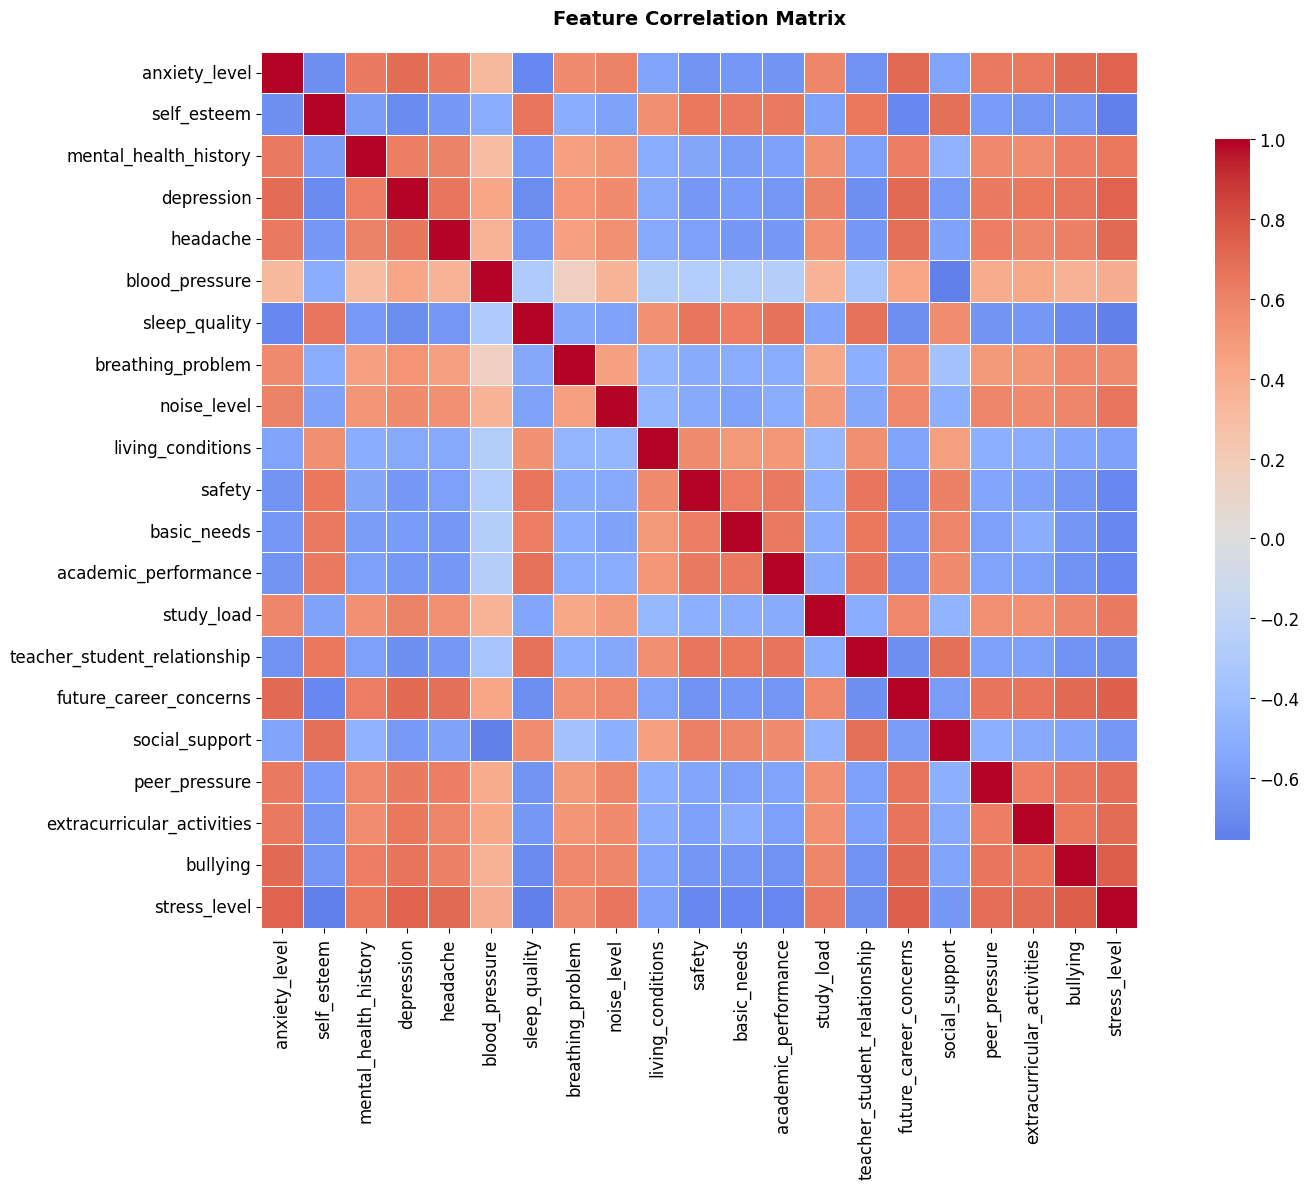

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
save_fig('correlation_matrix')
plt.show()

Saving figure target_correlation at /Users/macbook/Downloads/HCMUT/Assignments/Data Mining/images/target_correlation.png


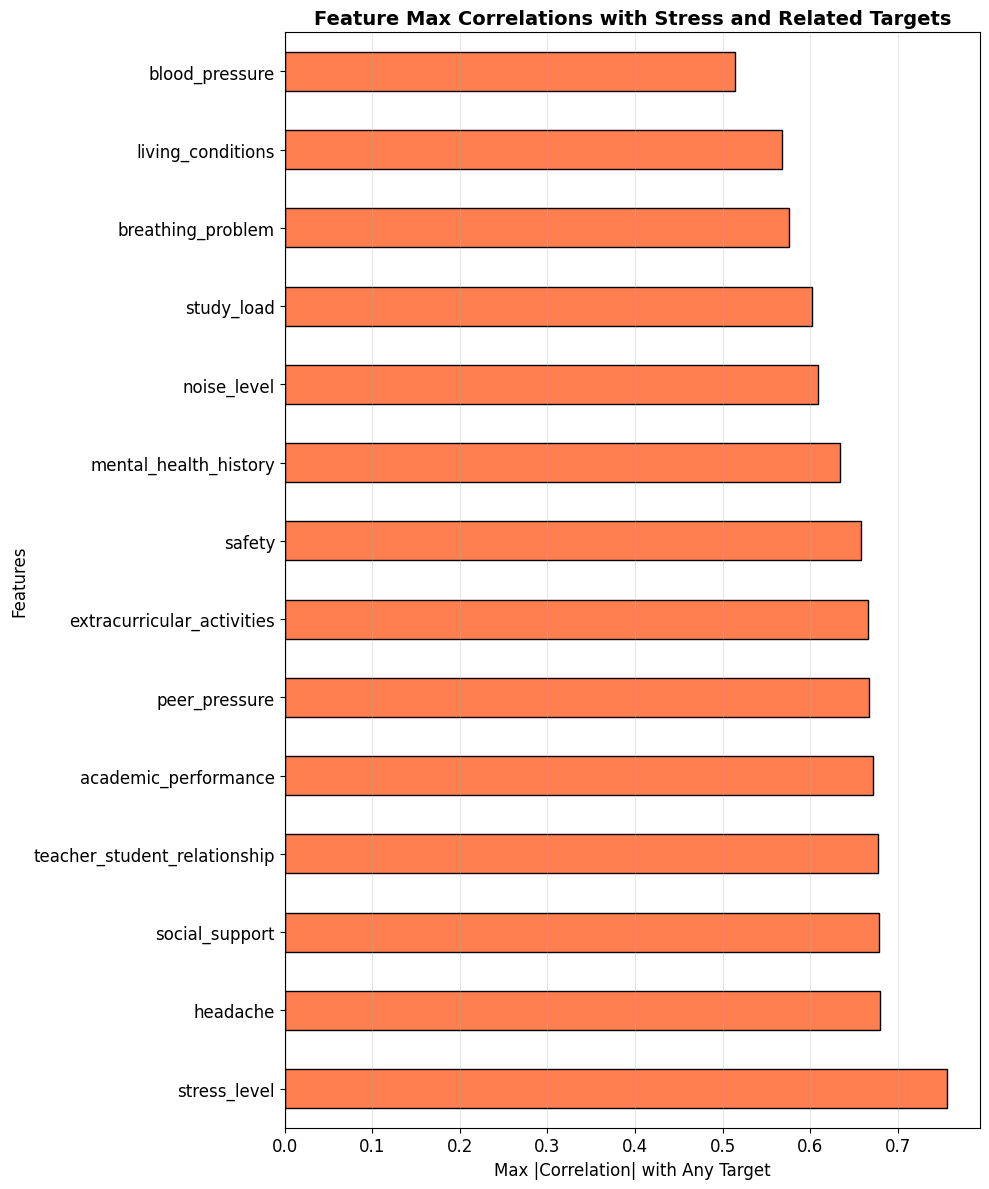

In [7]:
# Compute correlations between all features and the individual target columns
target_col = ["bullying", "anxiety_level", "future_career_concerns", "depression",
              "self_esteem", "sleep_quality", "basic_needs"]

# Calculate correlation of all features with each target (as a DataFrame)
correlations = df.corr()[target_col]

# Remove rows corresponding to the target columns themselves
correlations = correlations.drop(index=target_col, errors='ignore')

# For visualization: flatten to a Series of absolute max correlation for each feature to any target
abs_max_corr = correlations.abs().max(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
abs_max_corr.plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Max |Correlation| with Any Target', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Max Correlations with Stress and Related Targets', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
save_fig('target_correlation')
plt.show()

## Data Preprocessing Pipeline


In [8]:
# Run the complete preprocessing pipeline
X_train, X_test, y_train, y_test = preprocessor.preprocess_pipeline()


STARTING DATA PREPROCESSING PIPELINE
✓ Data loaded successfully: 1100 rows, 21 columns

DATA EXPLORATION

1. Dataset Shape:
   Rows: 1100, Columns: 21

2. Column Names and Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

3. Firs

In [9]:
# Check the shape of processed datasets
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (880, 20), y_train = (880,)
Testing set shape: X_test = (220, 20), y_test = (220,)


In [10]:
# Display first few rows of processed training data
print("Processed Training Features (first 5 rows):")
X_train.head()
print("\nTraining Target (first 5 values):")
y_train.head()

Processed Training Features (first 5 rows):

Training Target (first 5 values):


1069    1
1091    2
510     0
844     2
249     0
Name: stress_level, dtype: int64

## Save Processed Data


In [11]:
# Create directory for processed data if it doesn't exist
os.makedirs("../data/processed", exist_ok=True)

# Save processed datasets
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("✓ Processed data saved successfully:")
print("  - X_train.csv")
print("  - X_test.csv")
print("  - y_train.csv")
print("  - y_test.csv")

✓ Processed data saved successfully:
  - X_train.csv
  - X_test.csv
  - y_train.csv
  - y_test.csv


In [12]:
# Verify saved files
import os
print("\nFiles in processed directory:")
for file in sorted(os.listdir("../data/processed")):
    file_path = os.path.join("../data/processed", file)
    size = os.path.getsize(file_path)
    print(f"  - {file} ({size:,} bytes)")


Files in processed directory:
  - X_test.csv (86,268 bytes)
  - X_train.csv (344,089 bytes)
  - test_data.csv (82,262 bytes)
  - train_data.csv (323,118 bytes)
  - y_test.csv (453 bytes)
  - y_train.csv (1,773 bytes)


## Summary


In [13]:
# Print final summary
print("="*70)
print("PREPROCESSING SUMMARY")
print("="*70)
print(f"\nOriginal dataset shape: {preprocessor.data.shape}")
print(f"Features: {X_train.shape[1]}")
print(f"Training samples: {len(X_train)} ({len(X_train)/(len(X_train)+len(X_test))*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/(len(X_train)+len(X_test))*100:.1f}%)")
print(f"\nTarget distribution (training set):")
print(y_train.value_counts().sort_index())
print("\n✓ Preprocessing completed successfully!")
print("="*70)

PREPROCESSING SUMMARY

Original dataset shape: (1100, 21)
Features: 20
Training samples: 880 (80.0%)
Testing samples: 220 (20.0%)

Target distribution (training set):
stress_level
0    299
1    286
2    295
Name: count, dtype: int64

✓ Preprocessing completed successfully!
